<a href="https://colab.research.google.com/github/luizrhamada/desafio_bootcamp_unisenai/blob/main/desafio_bootcamp_LuizRodrigoHamada_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from matplotlib.colors import LinearSegmentedColormap
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, IsolationForest
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.mixture import BayesianGaussianMixture
from sklearn.decomposition import PCA
from sklearn.neighbors import LocalOutlierFactor, KNeighborsClassifier
from sklearn.feature_selection import VarianceThreshold
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.neural_network import MLPClassifier
from matplotlib.patches import Circle
from datetime import datetime

In [70]:
dados = pd.read_csv("/content/dataset_test_bootcamp/bootcamp_test.csv", sep=',', encoding='utf-8', decimal=',')

df = pd.DataFrame(dados)
df.head()

,id,x_minimo,x_maximo,y_minimo,y_maximo,peso_da_placa,area_pixels,perimetro_x,perimetro_y,soma_da_luminosidade,...,indice_de_variacao_x,indice_de_variacao_y,indice_global_externo,log_das_areas,log_indice_x,log_indice_y,indice_de_orientaçao,indice_de_luminosidade,sigmoide_das_areas,minimo_da_luminosidade
0,3390,1117,1154,1194359,1194414,100,1055,69,56,110262,...,0.057686371663244494,-0.13343940487330835,1.0,3.0233,1.5682,1.7404,0.3273,-0.1835,1.0,72
1,3391,1572,1610,337559,337645,100,1570,176,128,128770,...,-0.6406010325239759,0.1660415232037433,1.0,3.1959,1.5798,1.9345,0.5581,-0.3592,1.0,29
2,3392,1617,1628,2095494,2095507,100,89,14,13,7804,...,0.35826481437942537,0.5988475515586102,1.0,1.9494,1.0414,1.1139,0.1539,-0.315,0.257,77
3,3393,1317,1324,2166062,2166078,100,78,12,16,9381,...,-0.09418906885268437,-0.07878667519835858,1.0,1.8921,0.8451,1.2041,0.5625,-0.0604,0.2195,110
4,3394,386,394,1304617,1304626,100,51,10,9,5795,...,-0.017034573979123266,0.38202390587998203,1.0,1.7076,0.9031,0.9542,0.1111,-0.1123,0.1773,100


In [71]:
print(df.shape) # (389, 32)
print()
print(df.head()) # apresentando as cinco primeiras linhas
print()
print(df.tail()) # apresentado as últimas cinco linhas
print()
df.info()
print()
print(df.isnull().values.any())
print(df.isnull().sum())

(389, 32)

     id  x_minimo  x_maximo  y_minimo  y_maximo  peso_da_placa  area_pixels  \
0  3390      1117      1154   1194359   1194414            100         1055   
1  3391      1572      1610    337559    337645            100         1570   
2  3392      1617      1628   2095494   2095507            100           89   
3  3393      1317      1324   2166062   2166078            100           78   
4  3394       386       394   1304617   1304626            100           51   

   perimetro_x  perimetro_y  soma_da_luminosidade  ...   indice_de_variacao_x  \
0           69           56                110262  ...   0.057686371663244494   
1          176          128                128770  ...    -0.6406010325239759   
2           14           13                  7804  ...    0.35826481437942537   
3           12           16                  9381  ...   -0.09418906885268437   
4           10            9                  5795  ...  -0.017034573979123266   

   indice_de_variacao_y  in

In [72]:
# 1. Converter colunas numéricas que estão como object
cols_to_float = ['temperatura', 'index_de_bordas',
    'index_vazio', 'index_quadrado', 'index_externo_x',
    'indice_de_bordas_x', 'indice_de_bordas_y', 'indice_de_variacao_x',
    'indice_de_variacao_y', 'indice_global_externo', 'log_das_areas',
    'log_indice_x', 'log_indice_y', 'indice_de_orientaçao',
    'indice_de_luminosidade', 'sigmoide_das_areas'
]

for col in cols_to_float:
    # Primeiro substitui vírgulas por pontos para números com decimais
    df[col] = df[col].astype(str).str.replace(',', '.')
    # Converte para float, tratando possíveis erros
    df[col] = pd.to_numeric(df[col], errors='coerce')

df.info() # verifica que as colunas que antes eram do tipo object agora são numéricas do tipo float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389 entries, 0 to 388
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            389 non-null    int64  
 1   x_minimo                      389 non-null    int64  
 2   x_maximo                      389 non-null    int64  
 3   y_minimo                      389 non-null    int64  
 4   y_maximo                      389 non-null    int64  
 5   peso_da_placa                 389 non-null    int64  
 6   area_pixels                   389 non-null    int64  
 7   perimetro_x                   389 non-null    int64  
 8   perimetro_y                   389 non-null    int64  
 9   soma_da_luminosidade          389 non-null    int64  
 10  maximo_da_luminosidade        389 non-null    int64  
 11  comprimento_do_transportador  389 non-null    int64  
 12  tipo_do_aço_A300              389 non-null    int64  
 13  tipo_

In [73]:
def calcular_estatisticas(df, columns):

  for i in columns:
    media = df[i].mean()
    moda = stats.mode(df[i], keepdims=True).mode[0]
    desvio_padrao = df[i].std()
    valor_maximo = df[i].max()
    valor_minimo = df[i].min()

    print(f"\nEstatísticas para a coluna '{i}':")
    print(f"Média: {media:.2f}")
    print(f"Moda: {moda if isinstance(moda, str) else f'{moda:.2f}'}")
    print(f"Desvio Padrão: {desvio_padrao:.2f}")
    print(f"Valor Máximo: {valor_maximo}")
    print(f"Valor Mínimo: {valor_minimo}")

# Selecionando colunas numéricas para análise de outliers
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

calcular_estatisticas(df, numeric_cols)


Estatísticas para a coluna 'id':
Média: 3584.00
Moda: 3390.00
Desvio Padrão: 112.44
Valor Máximo: 3778
Valor Mínimo: 3390

Estatísticas para a coluna 'x_minimo':
Média: 533.02
Moda: 39.00
Desvio Padrão: 531.93
Valor Máximo: 1685
Valor Mínimo: 0

Estatísticas para a coluna 'x_maximo':
Média: 577.46
Moda: 214.00
Desvio Padrão: 511.61
Valor Máximo: 1692
Valor Mínimo: 8

Estatísticas para a coluna 'y_minimo':
Média: 1607497.66
Moda: 9228.00
Desvio Padrão: 1856154.94
Valor Máximo: 12806495
Valor Mínimo: 9228

Estatísticas para a coluna 'y_maximo':
Média: 1607542.54
Moda: 9246.00
Desvio Padrão: 1856150.02
Valor Máximo: 12806520
Valor Mínimo: 9246

Estatísticas para a coluna 'peso_da_placa':
Média: 100.00
Moda: 100.00
Desvio Padrão: 0.00
Valor Máximo: 100
Valor Mínimo: 100

Estatísticas para a coluna 'area_pixels':
Média: 1805.73
Moda: 55.00
Desvio Padrão: 3790.18
Valor Máximo: 25473
Valor Mínimo: 2

Estatísticas para a coluna 'perimetro_x':
Média: 103.81
Moda: 12.00
Desvio Padrão: 177.32
Va

In [74]:
print(df.duplicated().values.any())
print(df.nunique())

False
id                              389
x_minimo                        284
x_maximo                        307
y_minimo                        389
y_maximo                        389
peso_da_placa                     1
area_pixels                     284
perimetro_x                     163
perimetro_y                     138
soma_da_luminosidade            389
maximo_da_luminosidade           69
comprimento_do_transportador     52
tipo_do_aço_A300                  2
tipo_do_aço_A400                  2
espessura_da_chapa_de_aço        22
temperatura                     389
index_de_bordas                 325
index_vazio                     340
index_quadrado                  243
index_externo_x                 186
indice_de_bordas_x              246
indice_de_bordas_y              180
indice_de_variacao_x            389
indice_de_variacao_y            389
indice_global_externo             3
log_das_areas                   284
log_indice_x                     87
log_indice_y          


Remoção de outliers utilizando o Método IQR:
Com outliers: 389
Sem outliers (IQR): 196
Quantidade de outliers removidos: 193


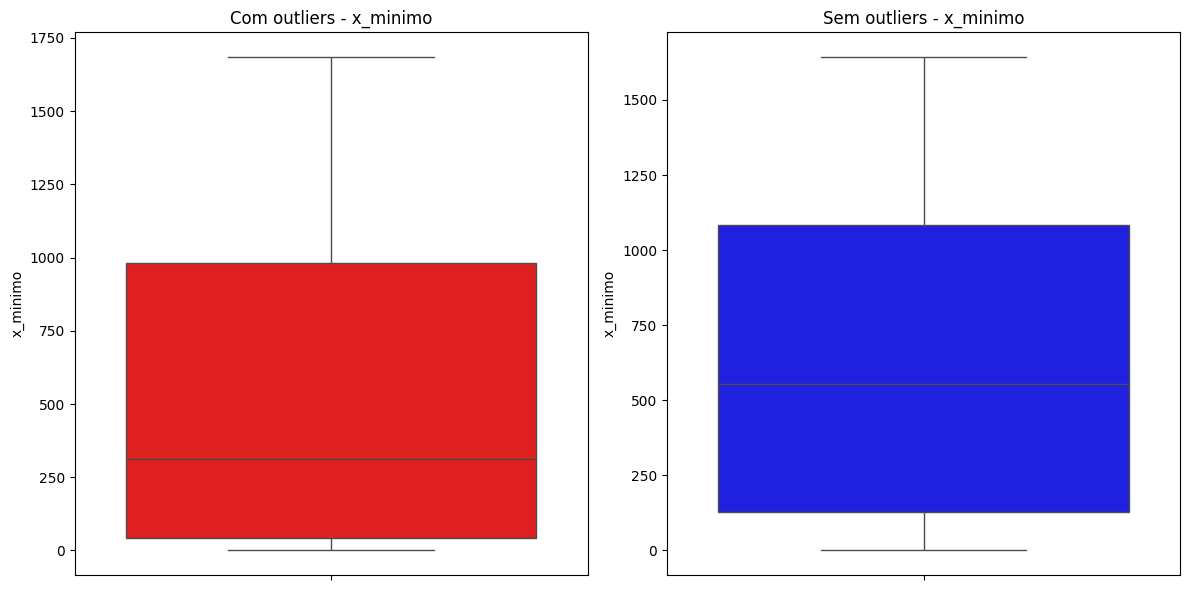

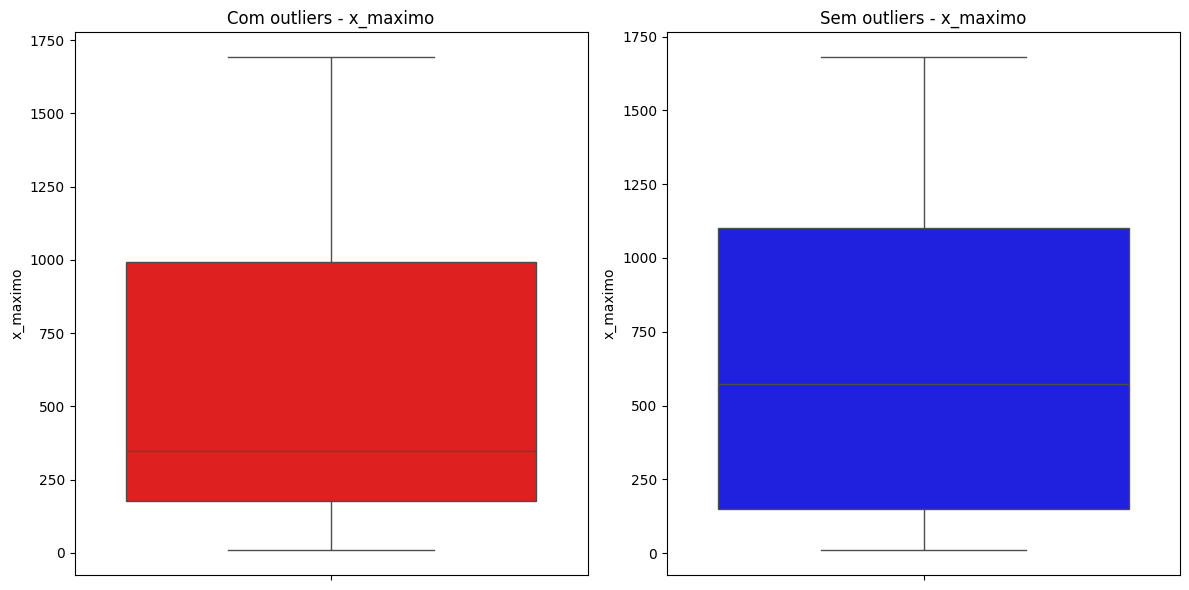

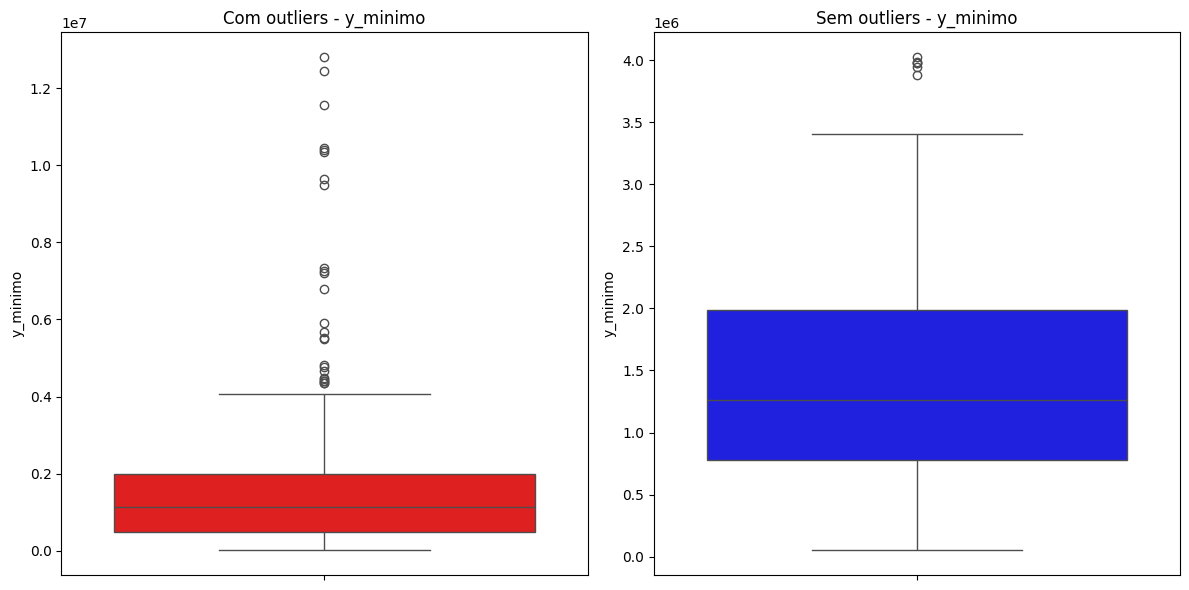

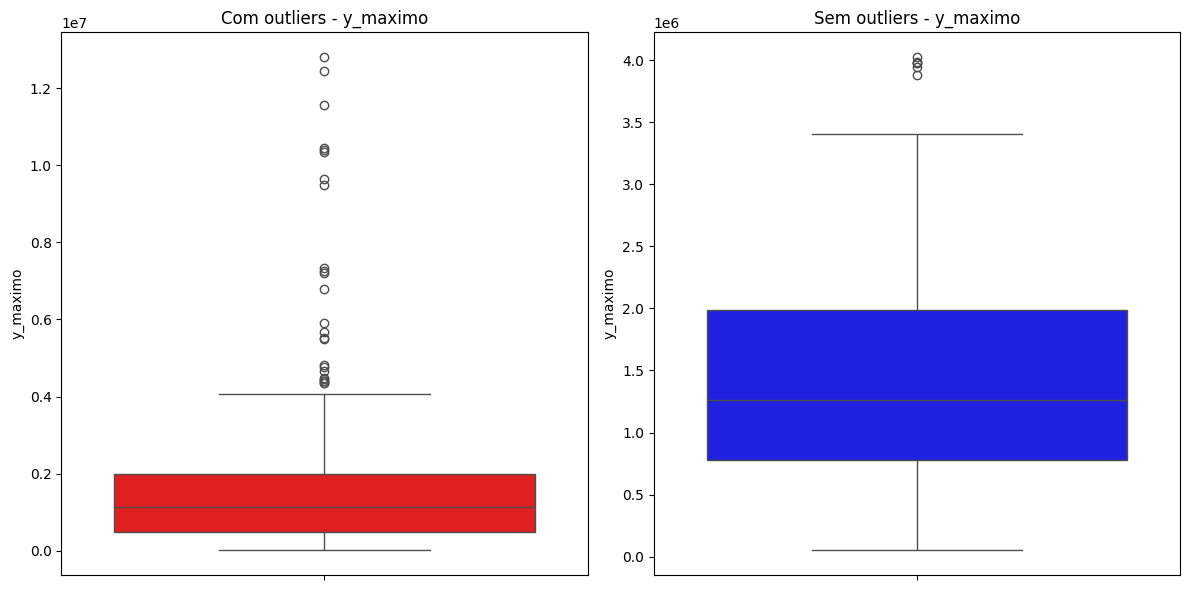

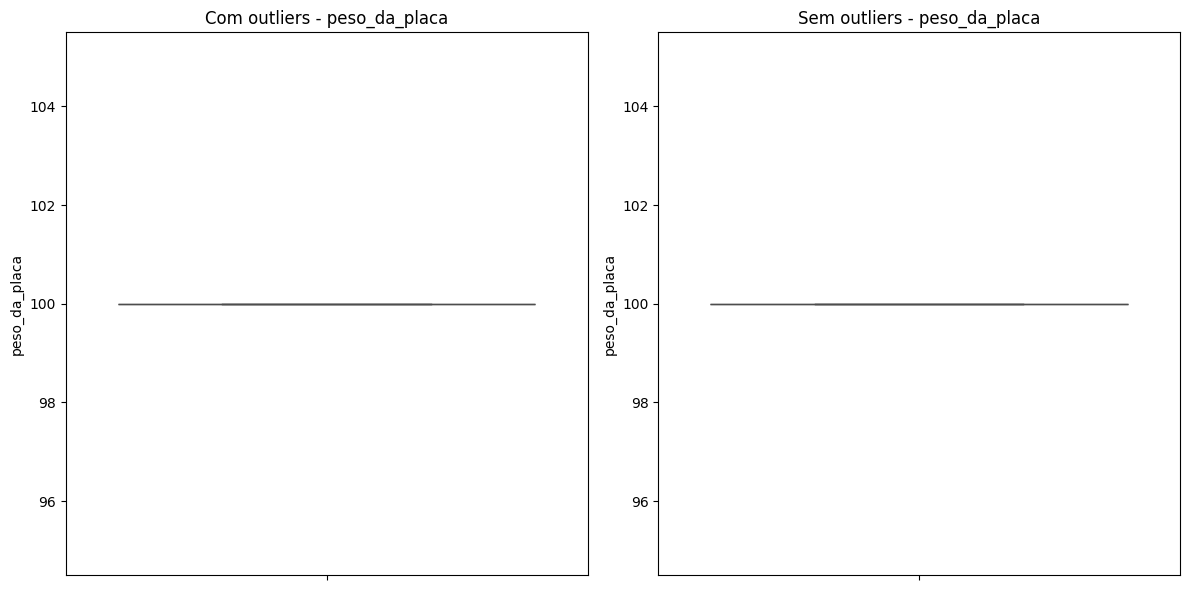

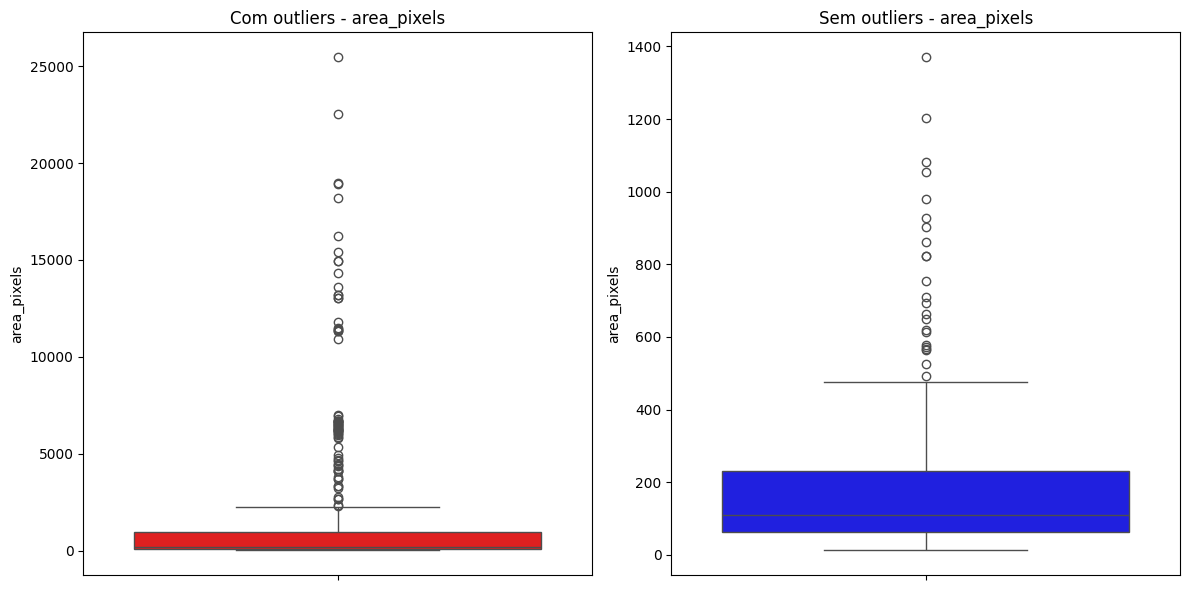

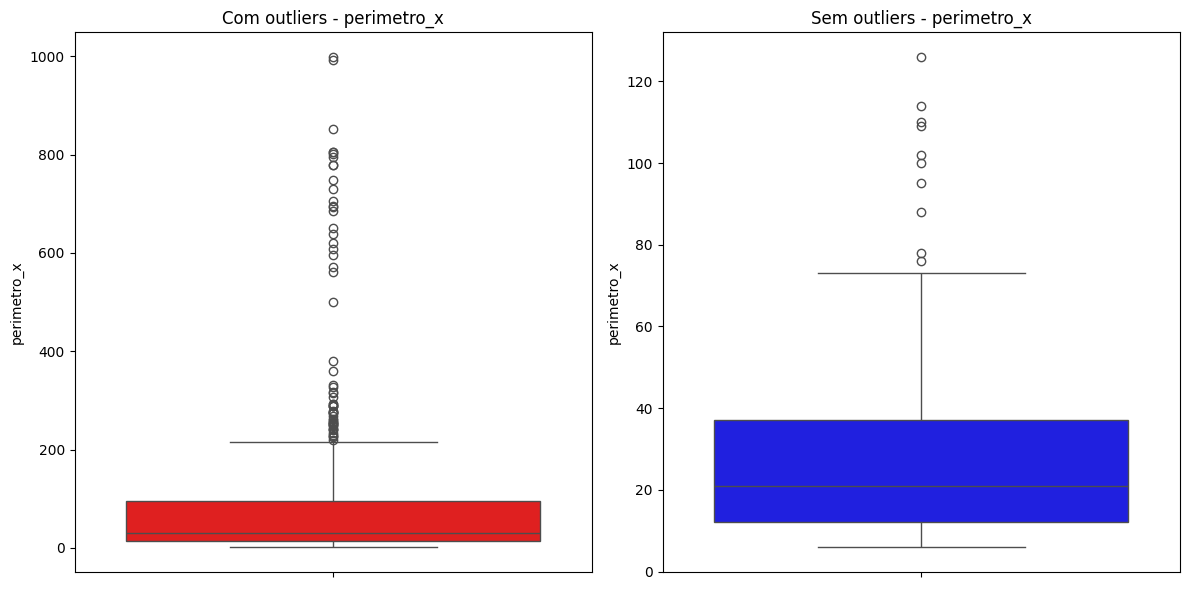

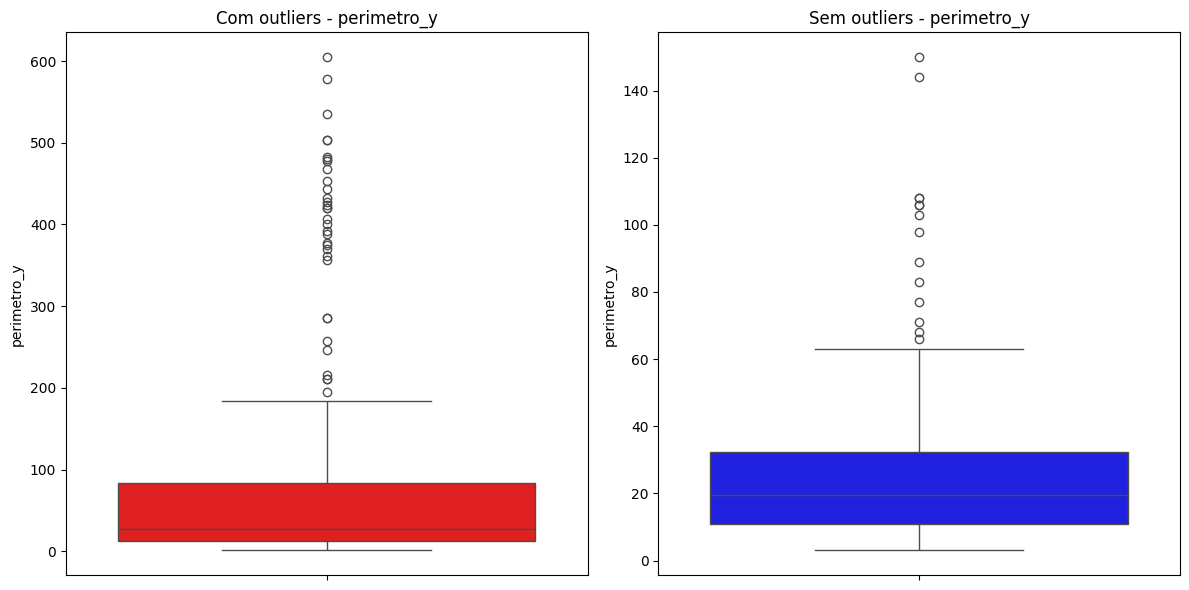

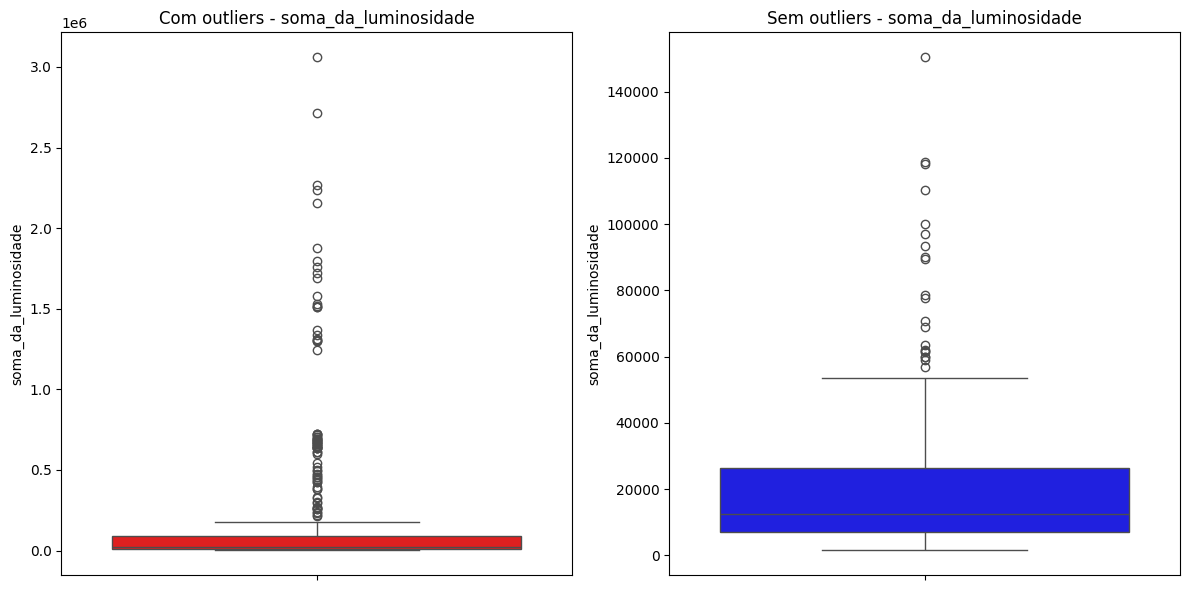

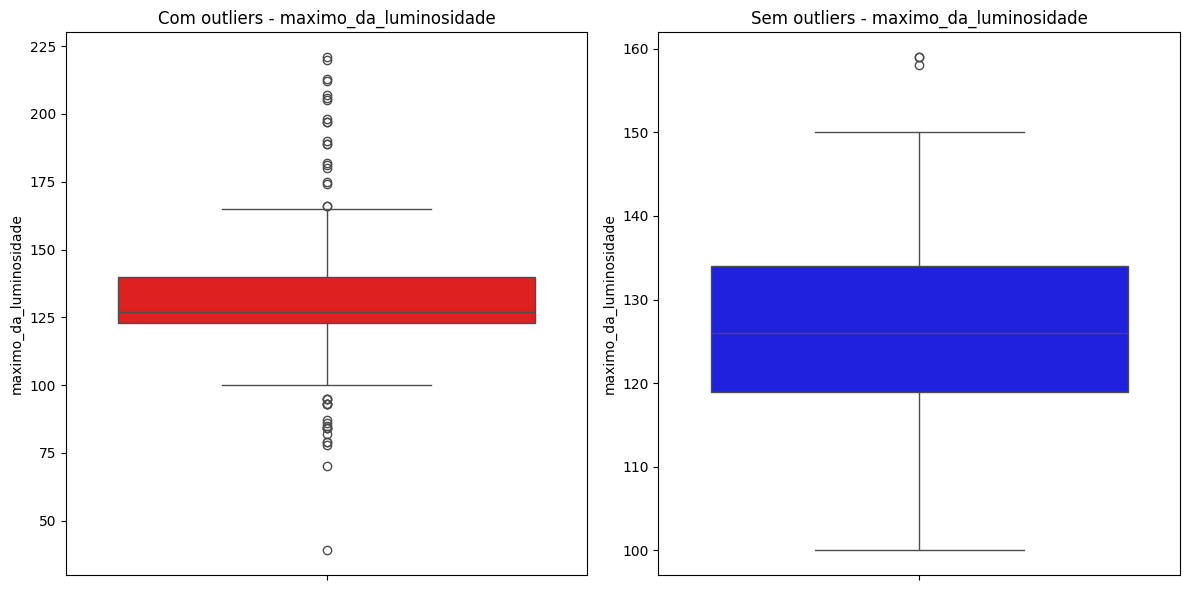

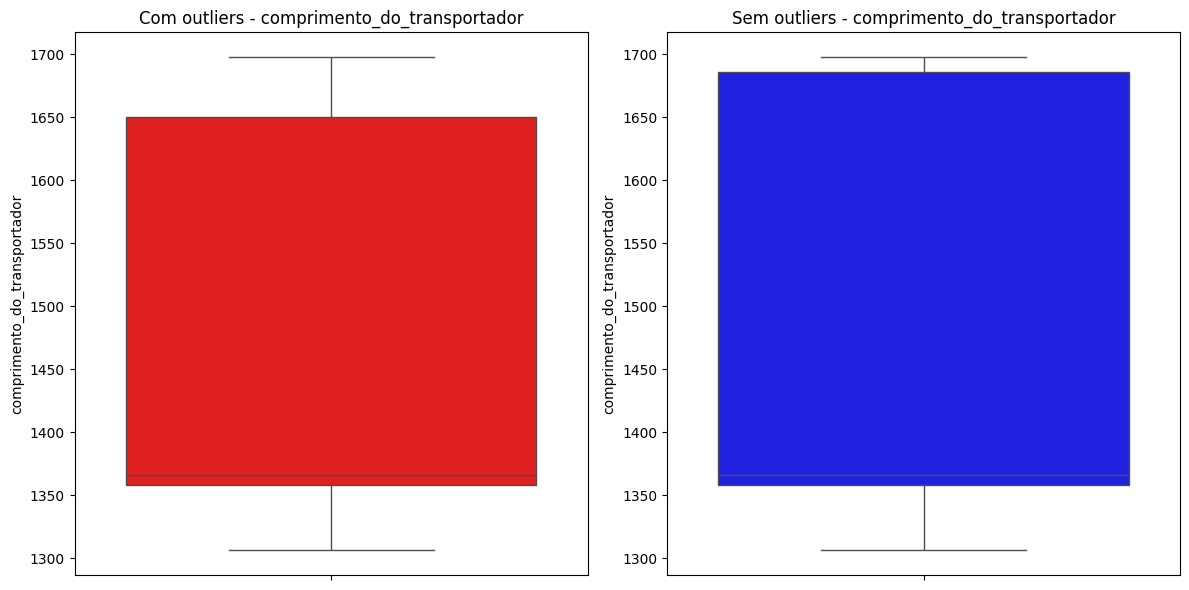

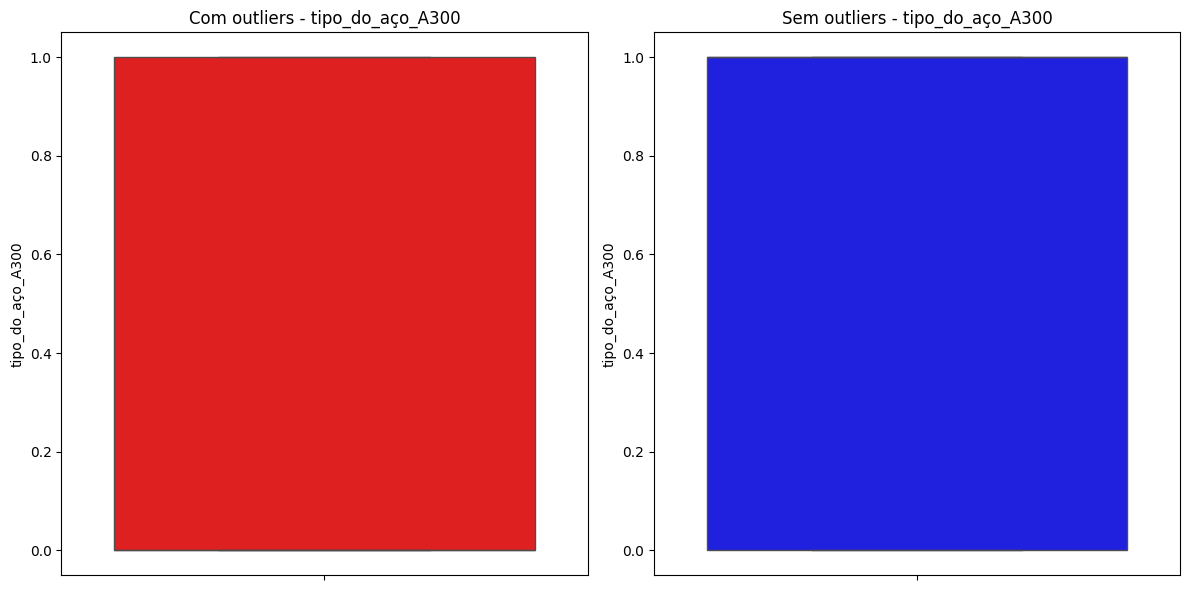

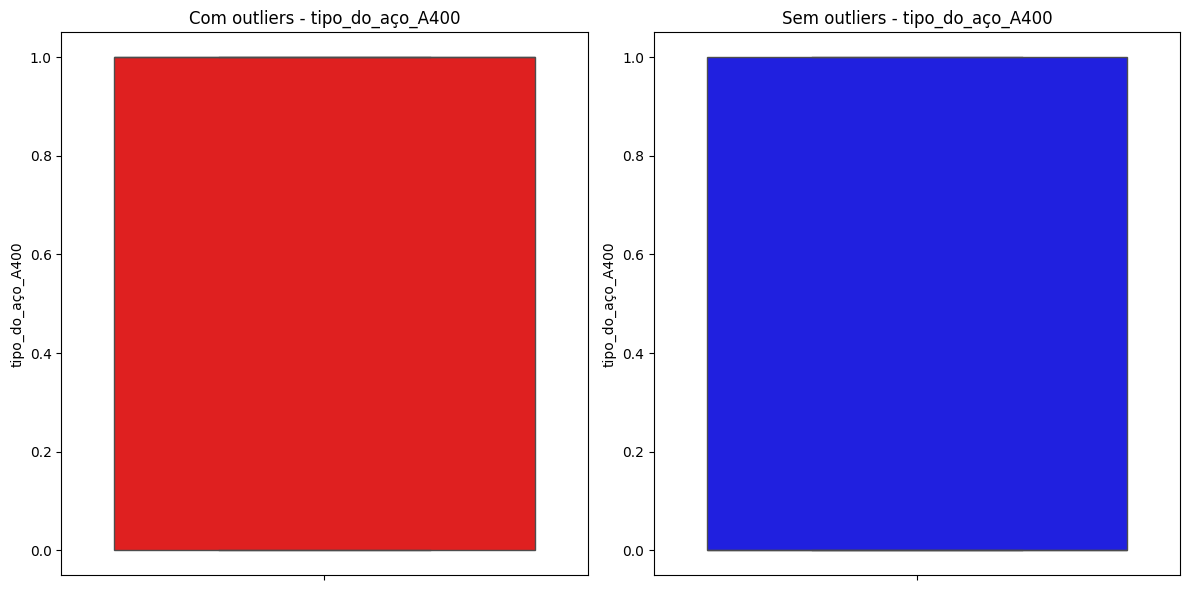

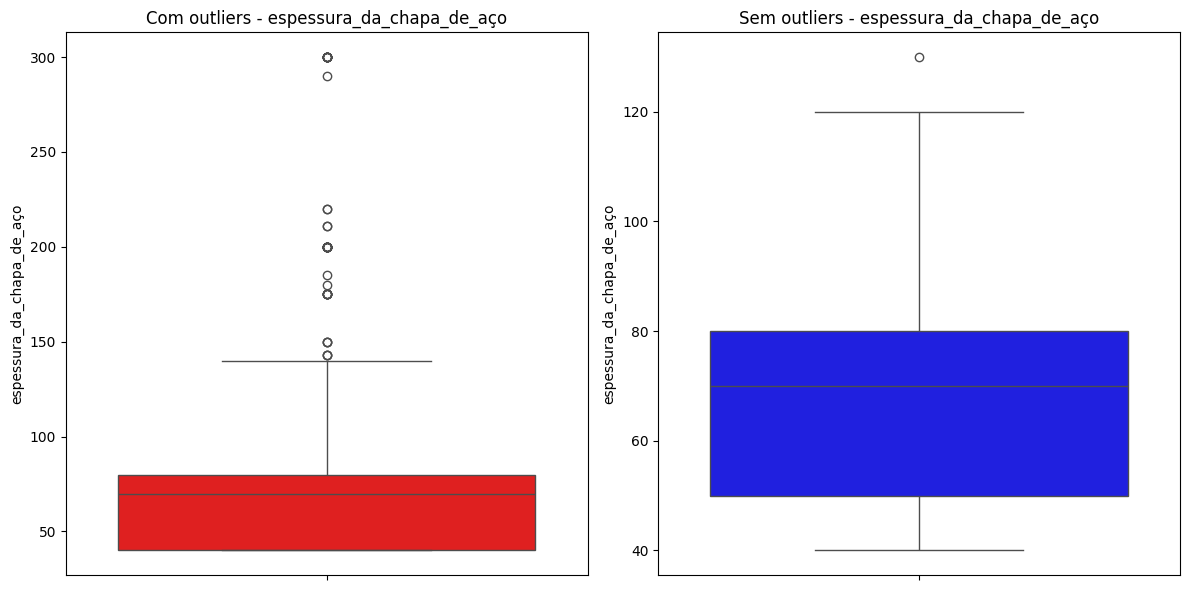

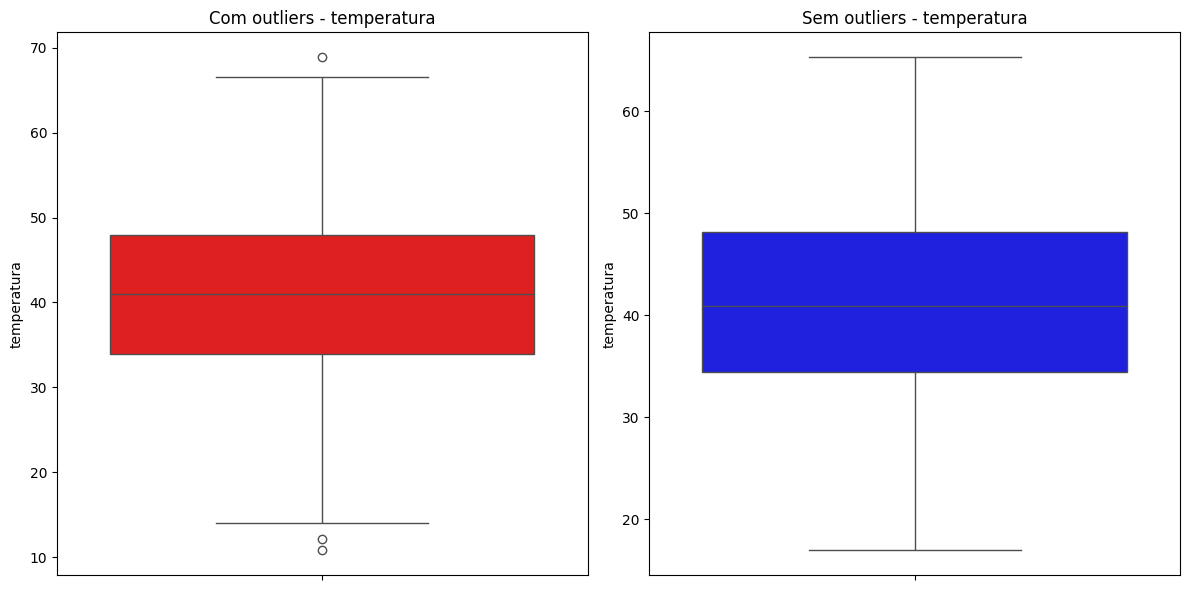

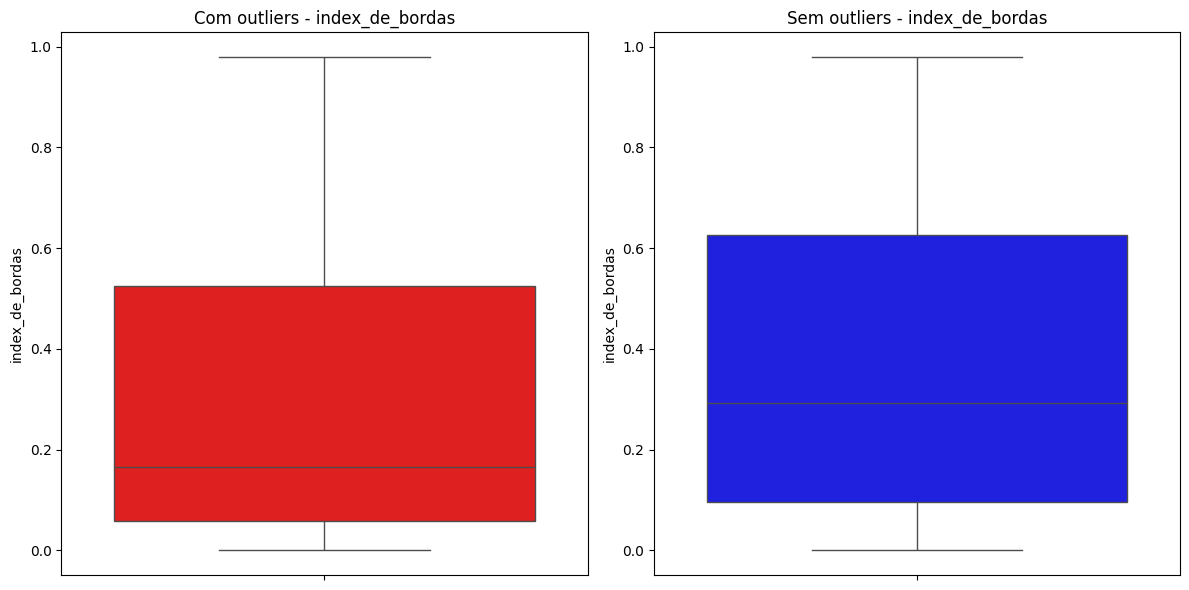

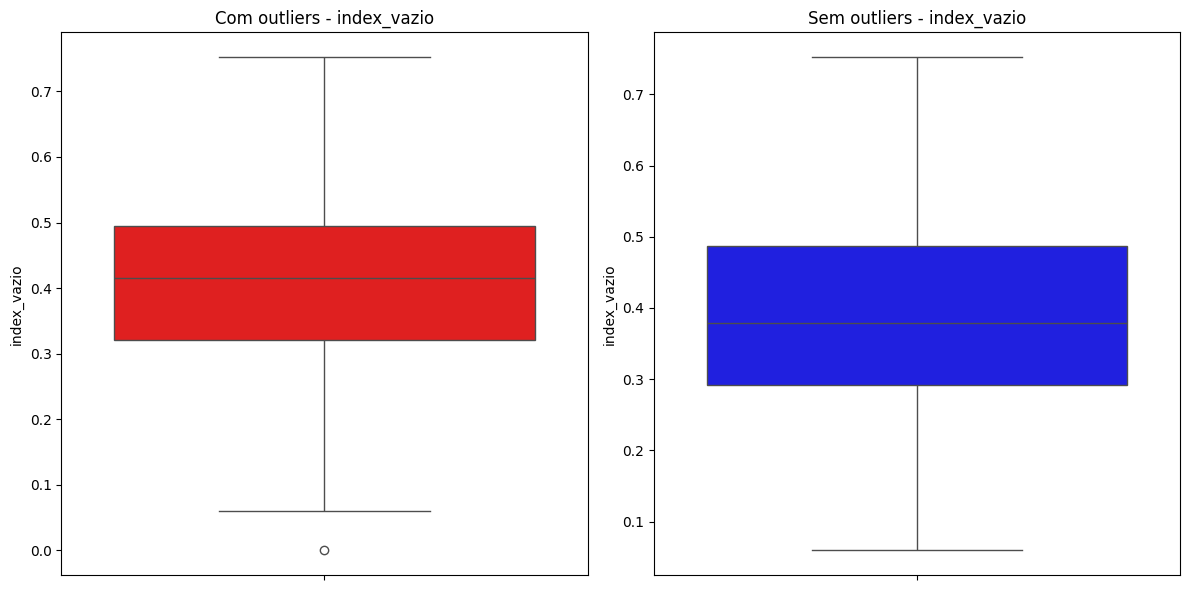

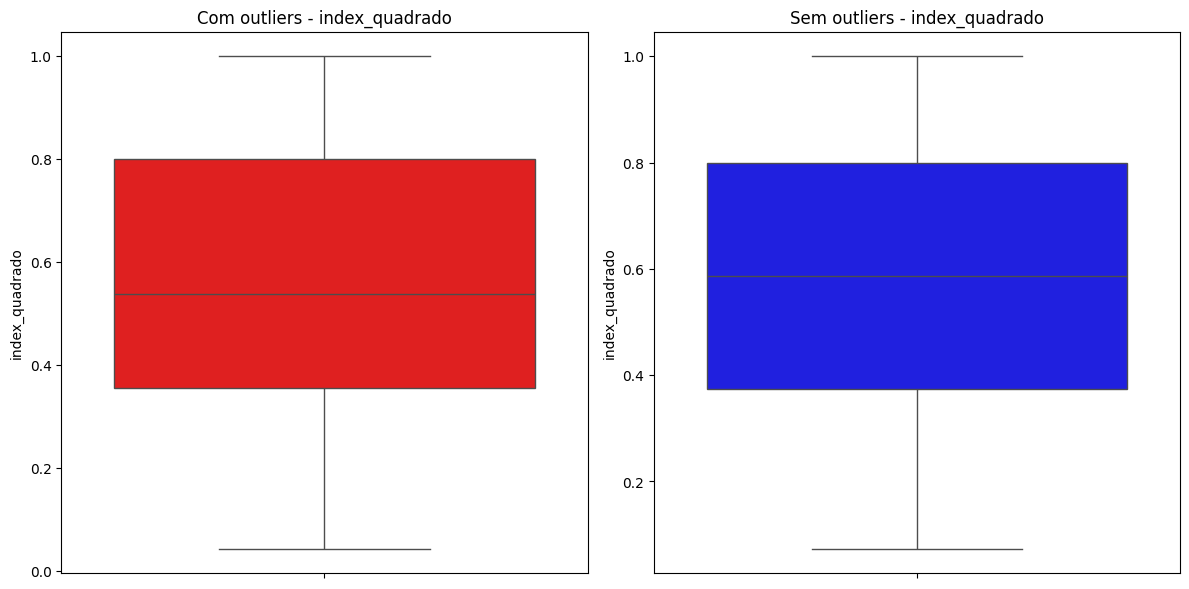

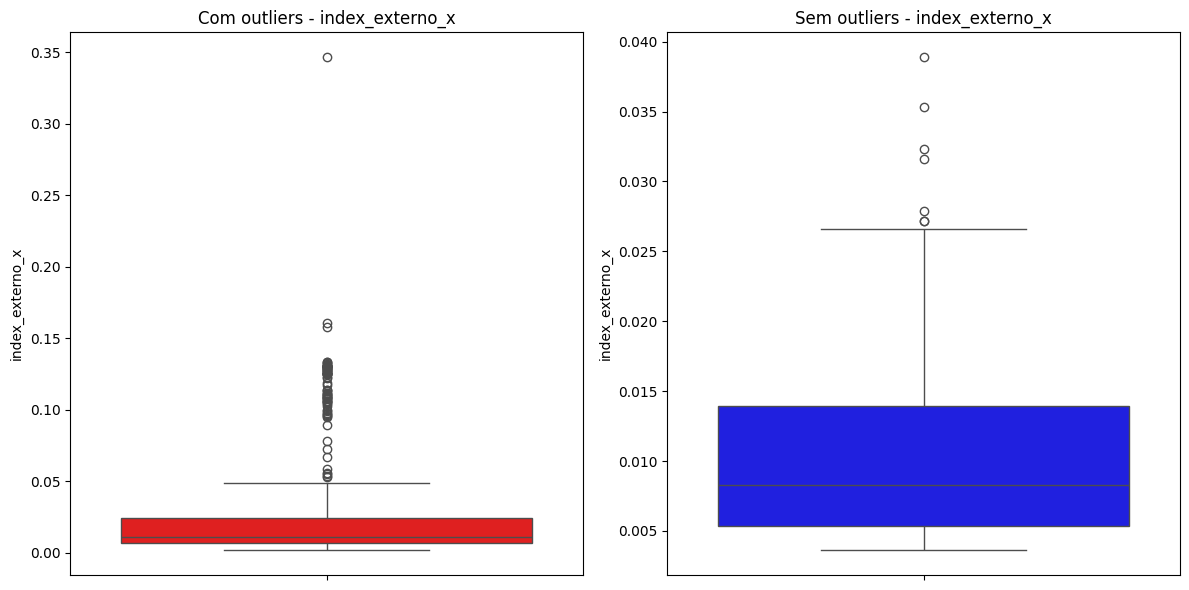

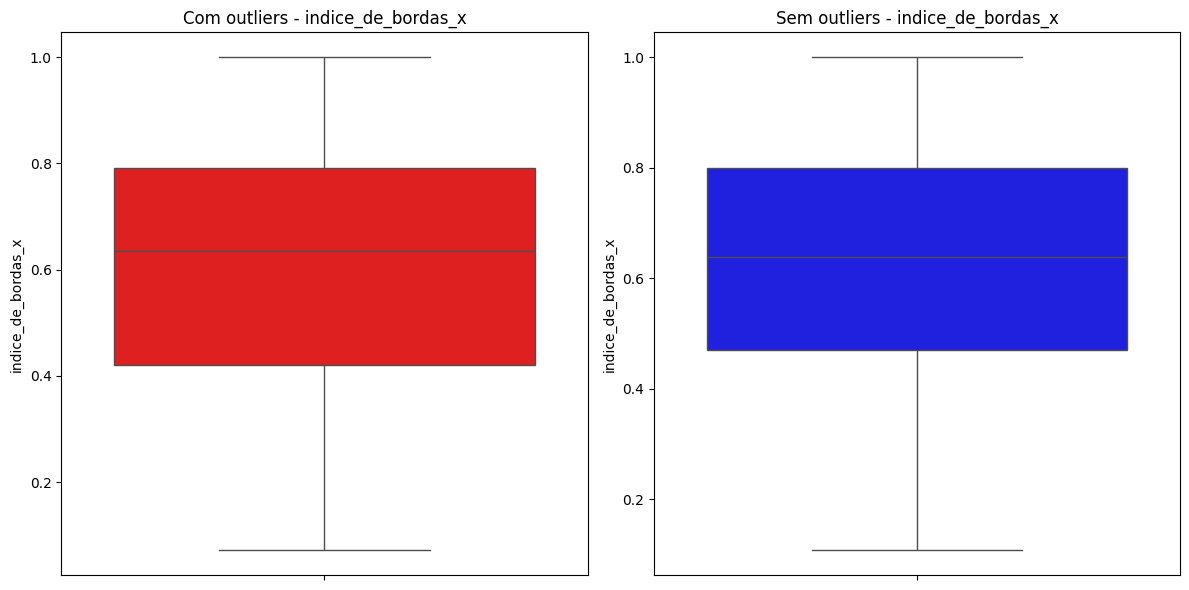

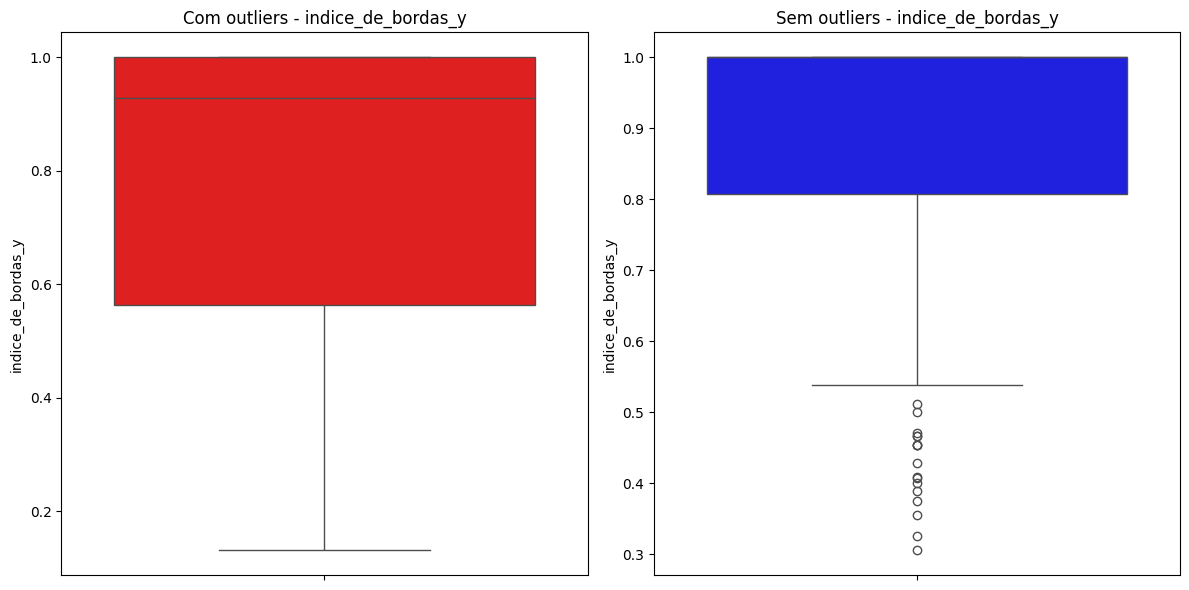

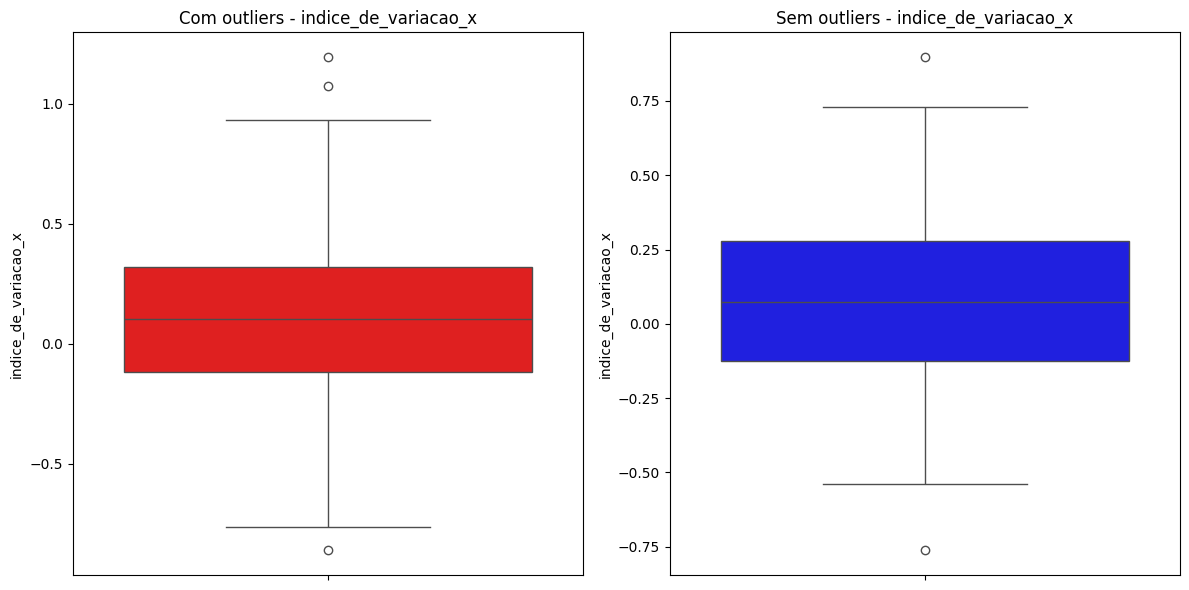

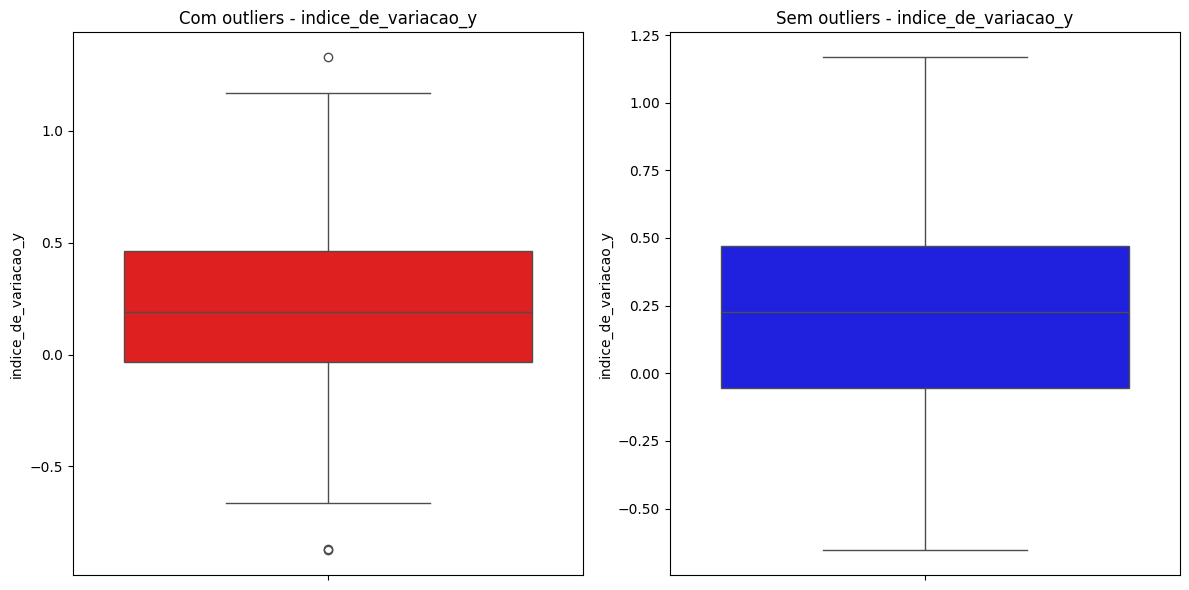

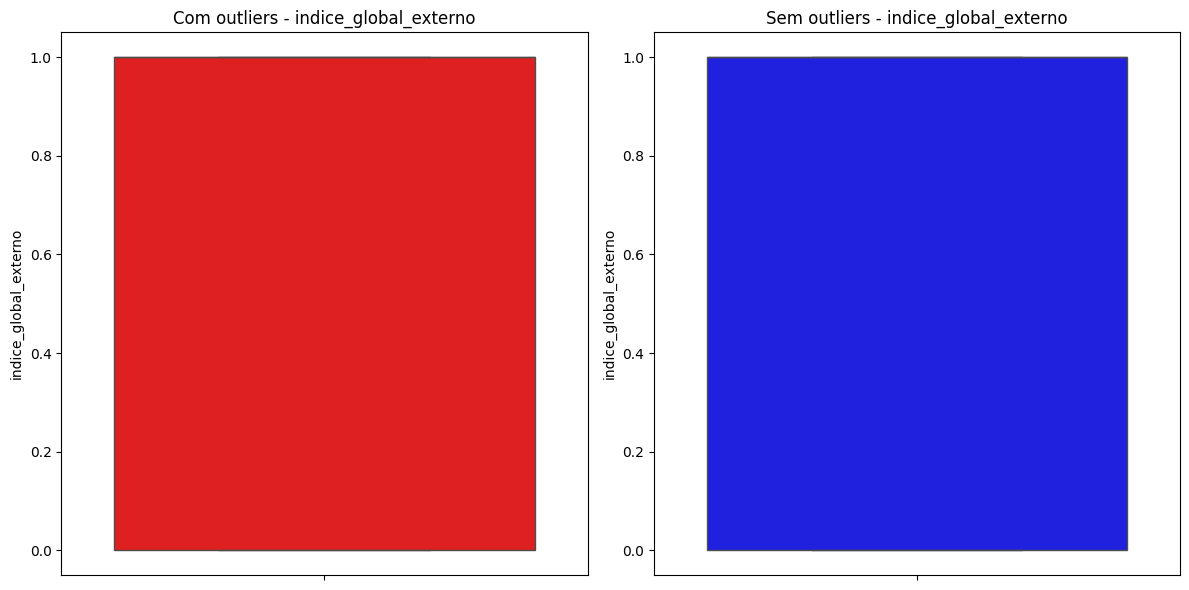

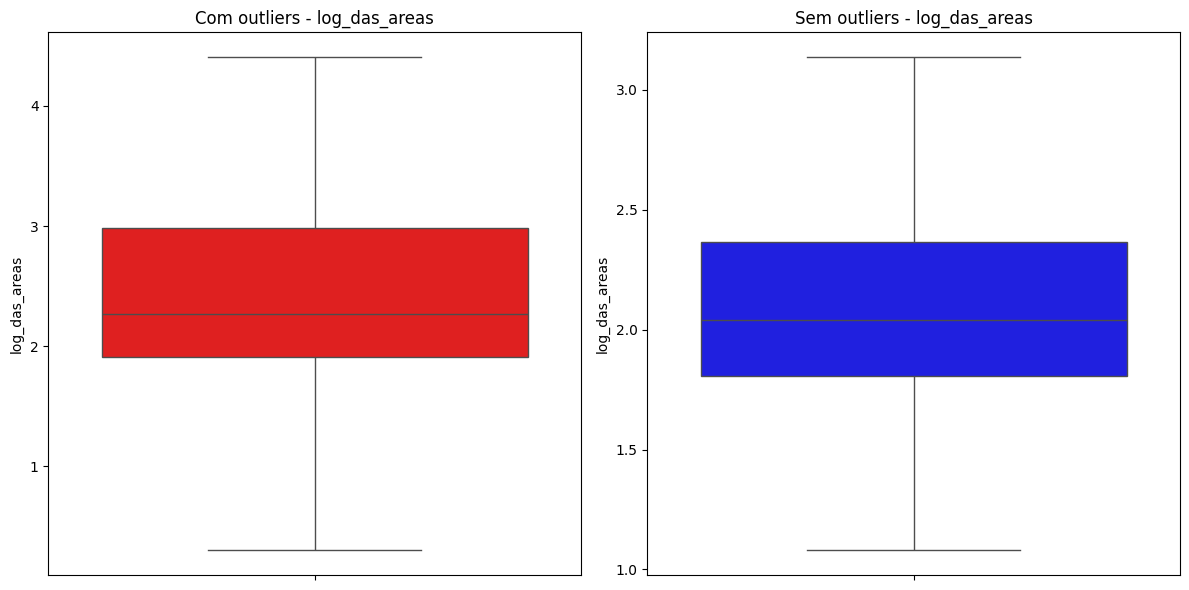

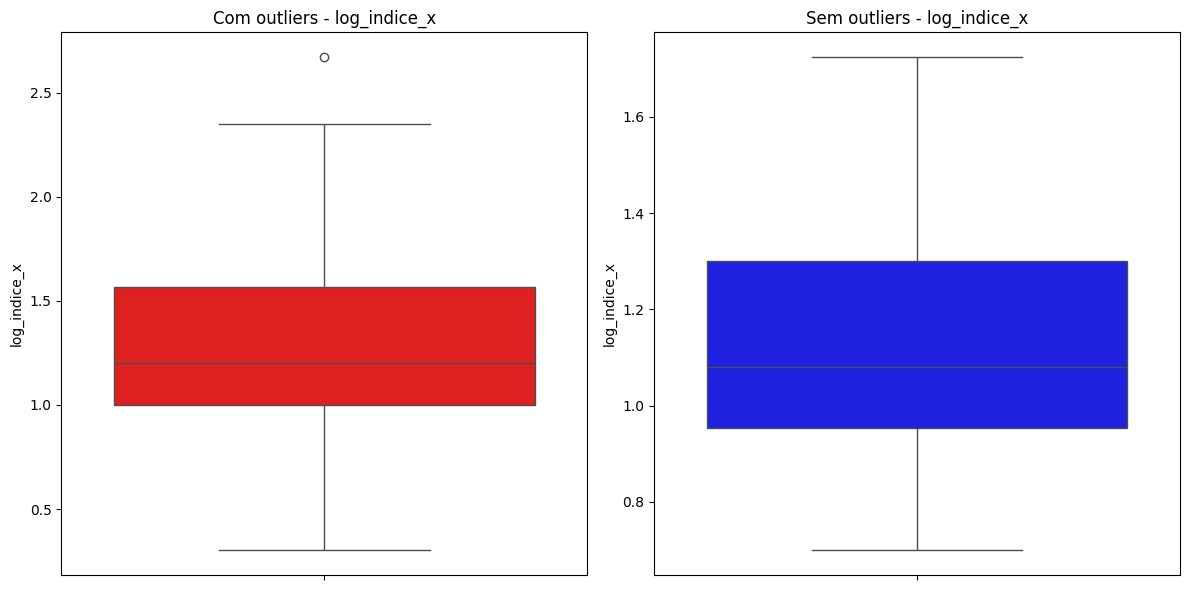

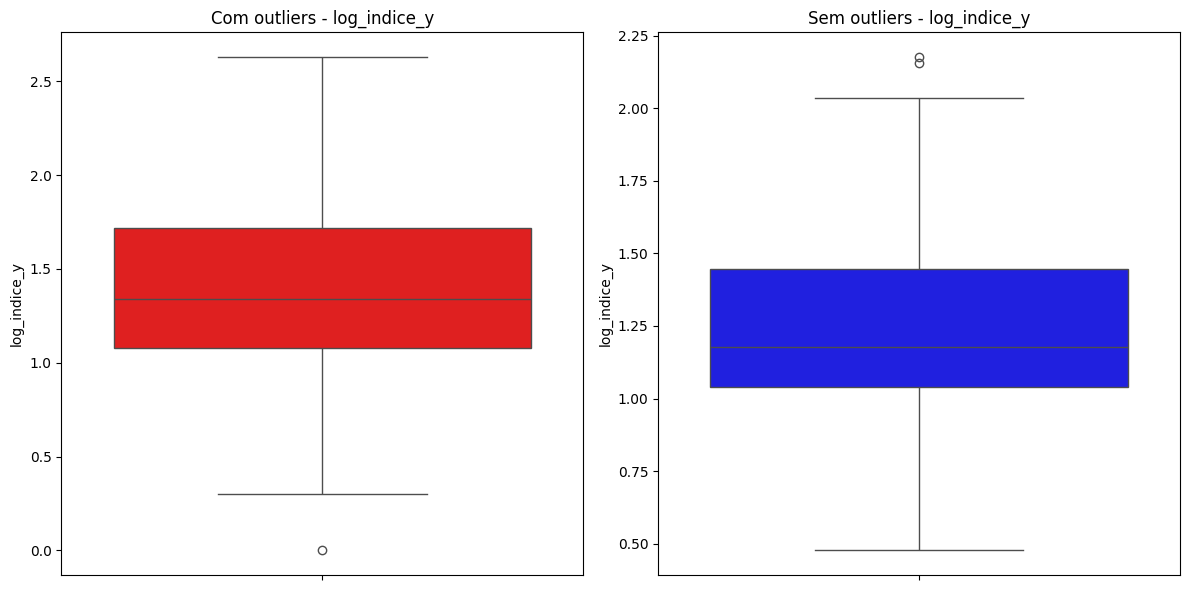

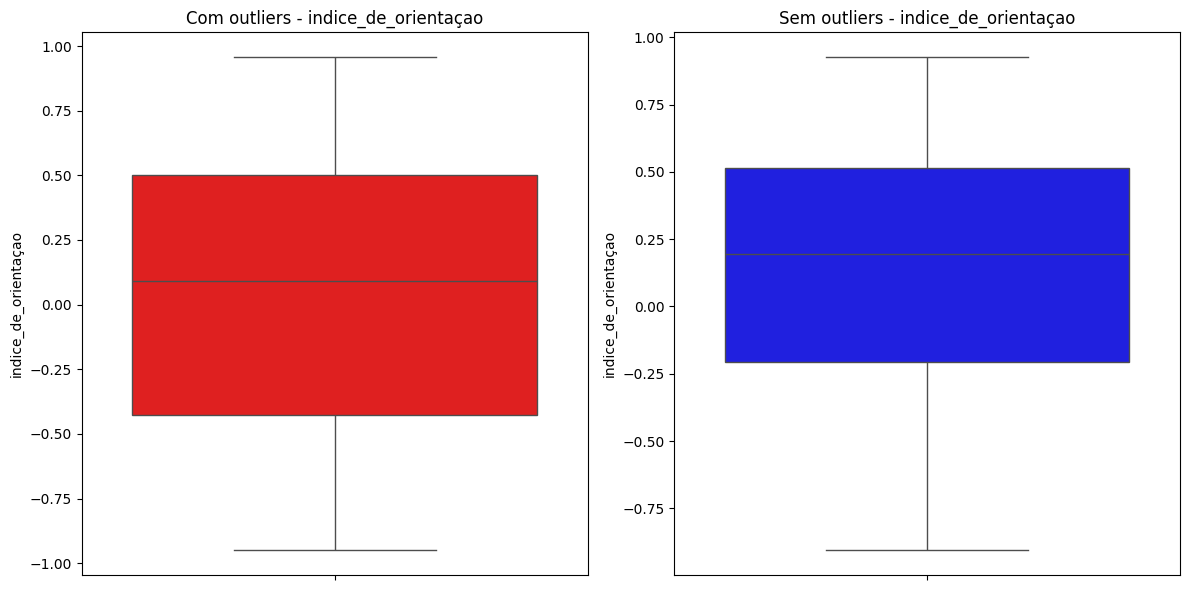

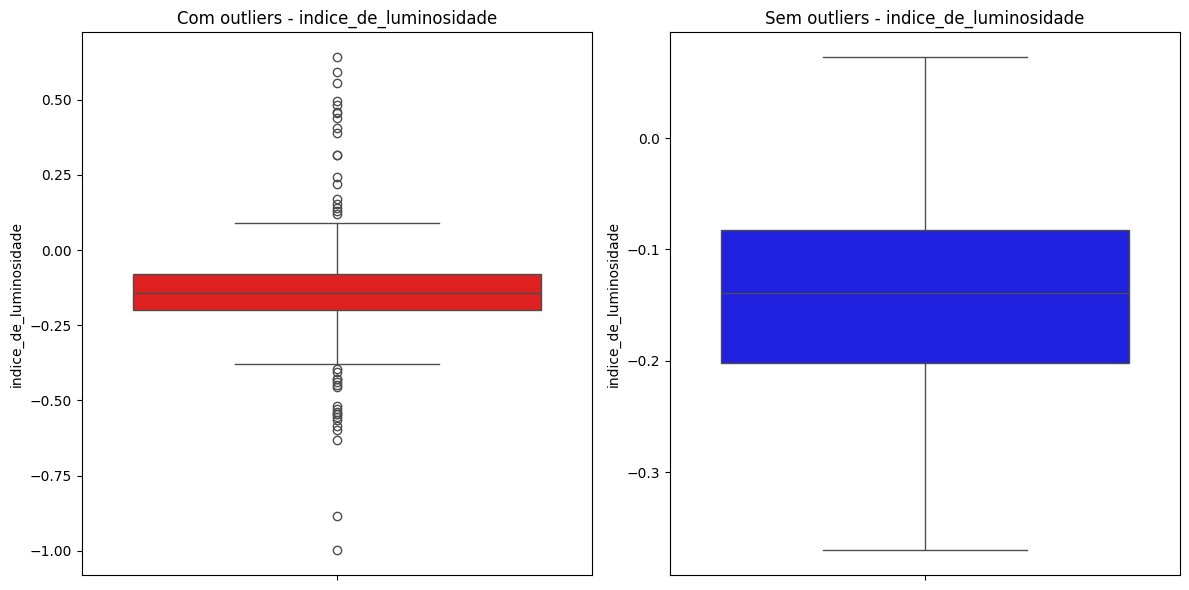

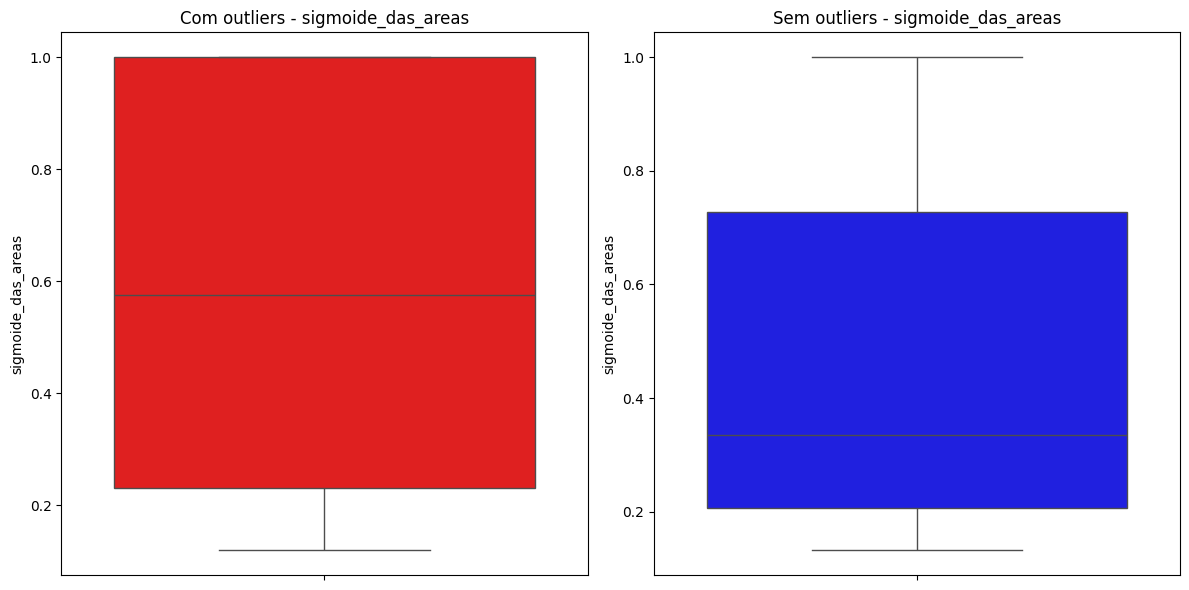

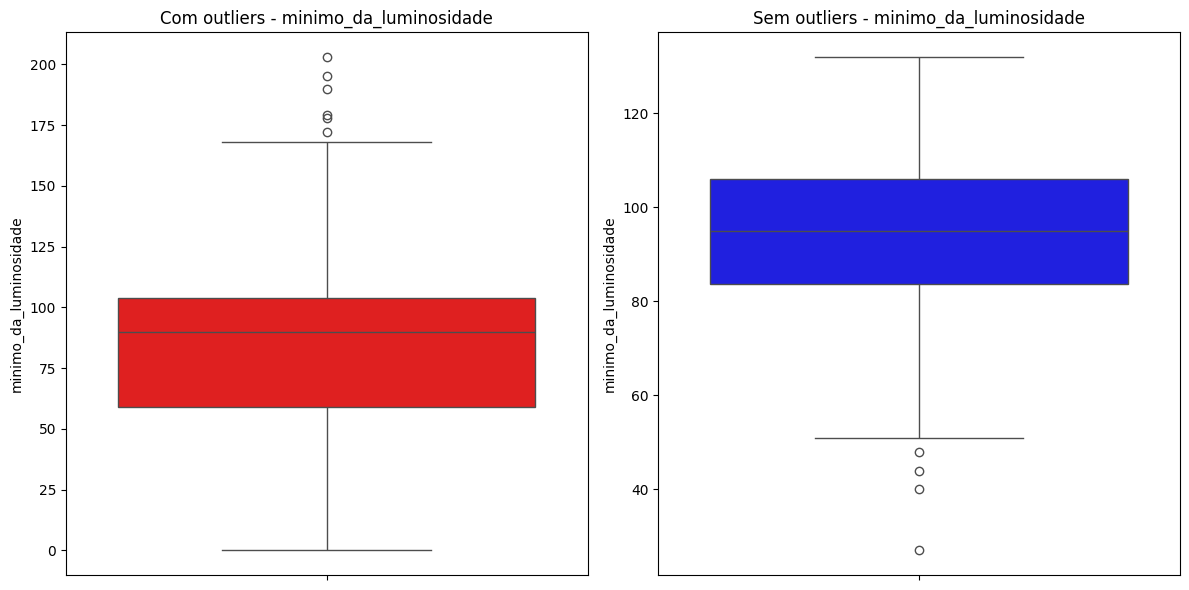

In [75]:
def remover_outliers_iqr(df, columns):
  df_clean = df.copy()
  for i in columns:
    if df_clean[i].dtype in ['int64', 'float64']:
      Q1 = df[i].quantile(0.25)  # Primeiro quartil (25%)
      Q3 = df[i].quantile(0.75)  # Terceiro quartil (75%)
      IQR = Q3 - Q1  # Intervalo interquartil
      limite_inf = Q1 - 1.5 * IQR
      limite_sup = Q3 + 1.5 * IQR

      # outliers_removidos = ((df_clean[i] < limite_inf) | df_clean[i] > limite_sup).sum()
      # print(f"Coluna '{i}': {outliers_removidos} outliers removidos")

      df_clean = df_clean[(df_clean[i] >= limite_inf) & (df_clean[i] <= limite_sup)]

  return df_clean

# Selecionar colunas numéricas para análise de outliers, exceto a ID
cols_df_clean = df.select_dtypes(include=['int64', 'float64']).columns
cols_df_clean = [col for col in cols_df_clean if col not in ['id'] + falha_chapa]

# Remover outliers
print("\nRemoção de outliers utilizando o Método IQR:")
df_clean_iqr = remover_outliers_iqr(df, cols_df_clean)

# Estatísticas pós-limpeza
print(f"Com outliers: {len(df)}")
print(f"Sem outliers (IQR): {len(df_clean_iqr)}")
print(f"Quantidade de outliers removidos: {len(df) - len(df_clean_iqr)}")

# Boxplots
for coluna in cols_df_clean:
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    sns.boxplot(data=df, y=coluna, color="red")
    plt.title(f"Com outliers - {coluna}")

    plt.subplot(1, 2, 2)
    sns.boxplot(data=df_clean_iqr, y=coluna, color="blue")
    plt.title(f"Sem outliers - {coluna}")

    plt.tight_layout()
    plt.show()

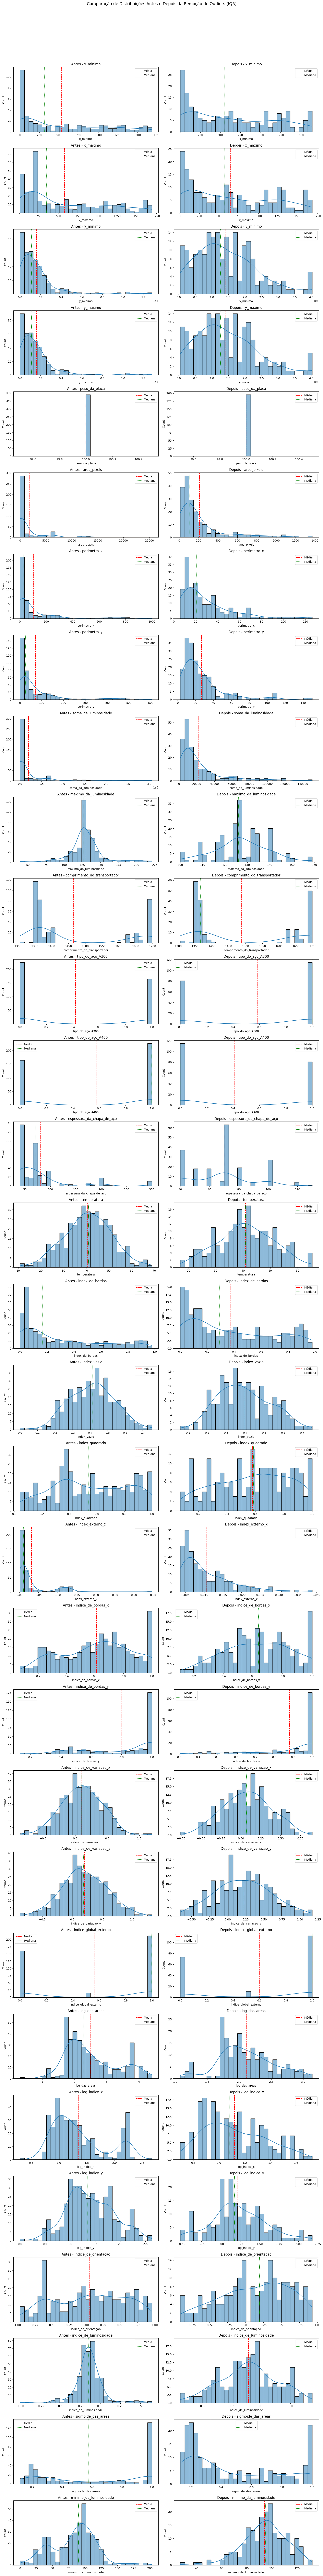

In [76]:
# Histograma para ver a distribuição

# Selecionar colunas numéricas (as mesmas usadas no IQR)
numeric_cols = [col for col in cols_df_clean if df[col].dtype in ['int64', 'float64']]

# Calcular número de linhas necessárias
n_cols = 2  # Antes e depois
n_rows = len(numeric_cols)

# Criar figura com subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4*n_rows))
fig.suptitle('Comparação de Distribuições Antes e Depois da Remoção de Outliers (IQR)', y=1.02, fontsize=14)

# Plotar histogramas para cada variável
for i, col in enumerate(numeric_cols):
    # Histograma antes
    sns.histplot(df[col], kde=True, ax=axes[i,0], bins=30)
    axes[i,0].axvline(df[col].mean(), color='red', linestyle='--', label='Média')
    axes[i,0].axvline(df[col].median(), color='green', linestyle=':', label='Mediana')
    axes[i,0].set_title(f'Antes - {col}')
    axes[i,0].legend()

    # Histograma depois
    sns.histplot(df_clean_iqr[col], kde=True, ax=axes[i,1], bins=30)
    axes[i,1].axvline(df_clean_iqr[col].mean(), color='red', linestyle='--', label='Média')
    axes[i,1].axvline(df_clean_iqr[col].median(), color='green', linestyle=':', label='Mediana')
    axes[i,1].set_title(f'Depois - {col}')
    axes[i,1].legend()

plt.tight_layout()
plt.show()

In [77]:
# Lista de colunas a serem removidas baseado na minha interpretação das analises acima
colunas_remover = ['id', 'peso_da_placa']

# Remove as colunas do DataFrame
df_filtrado = df_clean_iqr.drop(columns=colunas_remover)

# Verifica as colunas restantes
print("Colunas restantes:", df_filtrado.columns.tolist())

Colunas restantes: ['x_minimo', 'x_maximo', 'y_minimo', 'y_maximo', 'area_pixels', 'perimetro_x', 'perimetro_y', 'soma_da_luminosidade', 'maximo_da_luminosidade', 'comprimento_do_transportador', 'tipo_do_aço_A300', 'tipo_do_aço_A400', 'espessura_da_chapa_de_aço', 'temperatura', 'index_de_bordas', 'index_vazio', 'index_quadrado', 'index_externo_x', 'indice_de_bordas_x', 'indice_de_bordas_y', 'indice_de_variacao_x', 'indice_de_variacao_y', 'indice_global_externo', 'log_das_areas', 'log_indice_x', 'log_indice_y', 'indice_de_orientaçao', 'indice_de_luminosidade', 'sigmoide_das_areas', 'minimo_da_luminosidade']


In [78]:
# Supondo que seus dados estão em um DataFrame chamado 'df'
variancias = df_clean_iqr.var()  # Calcula a variância de cada coluna

# Define um limiar (ajuste conforme necessário)
limiar = 0.01

# Filtra colunas com variância abaixo do limiar
colunas_baixa_variancia = variancias[variancias < limiar].index.tolist()

print("Colunas candidatas à remoção (baixa variância):", colunas_baixa_variancia)

df_filtrado.head()

Colunas candidatas à remoção (baixa variância): ['peso_da_placa', 'index_externo_x', 'indice_de_luminosidade']


,x_minimo,x_maximo,y_minimo,y_maximo,area_pixels,perimetro_x,perimetro_y,soma_da_luminosidade,maximo_da_luminosidade,comprimento_do_transportador,...,indice_de_variacao_x,indice_de_variacao_y,indice_global_externo,log_das_areas,log_indice_x,log_indice_y,indice_de_orientaçao,indice_de_luminosidade,sigmoide_das_areas,minimo_da_luminosidade
0,1117,1154,1194359,1194414,1055,69,56,110262,125,1687,...,0.057686,-0.133439,1.0,3.0233,1.5682,1.7404,0.3273,-0.1835,1.0000,72
2,1617,1628,2095494,2095507,89,14,13,7804,100,1658,...,0.358265,0.598848,1.0,1.9494,1.0414,1.1139,0.1539,-0.3150,0.2570,77
3,1317,1324,2166062,2166078,78,12,16,9381,132,1352,...,-0.094189,-0.078787,1.0,1.8921,0.8451,1.2041,0.5625,-0.0604,0.2195,110
4,386,394,1304617,1304626,51,10,9,5795,133,1624,...,-0.017035,0.382024,1.0,1.7076,0.9031,0.9542,0.1111,-0.1123,0.1773,100
5,227,256,1593586,1593597,126,51,36,15951,148,1368,...,-0.223518,-0.185940,0.0,2.1004,1.4624,1.0414,-0.6207,-0.0110,0.5279,112


In [79]:
corr_matrix = df_filtrado.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
for col in upper.columns:
    if any(upper[col] > 0.8):  # Threshold de correlação
        print(f"Coluna '{col}' está altamente correlacionada")

Coluna 'x_maximo' está altamente correlacionada
Coluna 'y_maximo' está altamente correlacionada
Coluna 'perimetro_x' está altamente correlacionada
Coluna 'perimetro_y' está altamente correlacionada
Coluna 'soma_da_luminosidade' está altamente correlacionada
Coluna 'tipo_do_aço_A400' está altamente correlacionada
Coluna 'log_das_areas' está altamente correlacionada
Coluna 'log_indice_x' está altamente correlacionada
Coluna 'log_indice_y' está altamente correlacionada
Coluna 'indice_de_orientaçao' está altamente correlacionada
Coluna 'indice_de_luminosidade' está altamente correlacionada
Coluna 'sigmoide_das_areas' está altamente correlacionada
Coluna 'minimo_da_luminosidade' está altamente correlacionada


In [91]:
from joblib import load
# import os
# print(os.path.abspath('modelo_random_forest.joblib'))

# 1. Carregar o modelo
modelo = load('/content/dataset_test_bootcamp/modelo_random_forest.joblib')

# 2. Carregar o novo dataset (substitua pelo seu arquivo)
df_novo = pd.read_csv('/content/dataset_test_bootcamp/bootcamp_test.csv')  # Ou qualquer formato (Excel, Parquet, etc.)

# 3. Preparar os dados (mesmas colunas do treino)
X_novo = df_filtrado.iloc[:, 0:21].values

# 4. Fazer previsões
previsoes = modelo.predict(X_novo)
probabilidades = modelo.predict_proba(X_novo)


# Analisando as cinco primeiro amostras
print("Probabilidades para as primeiras 5 amostras:")
for i in range(5):
    print(f"Amostra {i+1}:")
    for j, (falha, prob_array) in enumerate(zip(['falha_1', 'falha_2', 'falha_3', 'falha_4',
                                               'falha_5', 'falha_6', 'falha_outros'], probabilidades)):
        # prob_array é a matriz de probabilidades para esta falha específica
        # prob_array[i][1] é a probabilidade da classe positiva para a i-ésima amostra
        print(f" Probabilidade da {falha}: {prob_array[i][1]:.2%}")


Probabilidades para as primeiras 5 amostras:
Amostra 1:
 Probabilidade da falha_1: 17.00%
 Probabilidade da falha_2: 26.00%
 Probabilidade da falha_3: 16.00%
 Probabilidade da falha_4: 0.00%
 Probabilidade da falha_5: 5.00%
 Probabilidade da falha_6: 8.00%
 Probabilidade da falha_outros: 28.00%
Amostra 2:
 Probabilidade da falha_1: 14.00%
 Probabilidade da falha_2: 27.00%
 Probabilidade da falha_3: 21.00%
 Probabilidade da falha_4: 0.00%
 Probabilidade da falha_5: 8.00%
 Probabilidade da falha_6: 4.00%
 Probabilidade da falha_outros: 26.00%
Amostra 3:
 Probabilidade da falha_1: 22.00%
 Probabilidade da falha_2: 23.00%
 Probabilidade da falha_3: 10.00%
 Probabilidade da falha_4: 3.00%
 Probabilidade da falha_5: 5.00%
 Probabilidade da falha_6: 9.00%
 Probabilidade da falha_outros: 28.00%
Amostra 4:
 Probabilidade da falha_1: 13.00%
 Probabilidade da falha_2: 27.00%
 Probabilidade da falha_3: 24.00%
 Probabilidade da falha_4: 1.00%
 Probabilidade da falha_5: 6.00%
 Probabilidade da falha